<h1 style="text-align: center;" markdown="1">ANLY501 Project 3</h1>

<center>**Group members: Wupeng Han, Jiajia Liu, Jiaxu He**</center>

In [206]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [64]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import pylab as pl
from sklearn import decomposition
from pprint import pprint
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from apyori import apriori
from datetime import datetime
#from pandas.tools.plotting import scatter_matri
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(12345)
from IPython.display import Image
from IPython.core.display import HTML 

# 1. Introduction
## 1.1-Project Description And  Background
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are many different  factors that may affect stock price fluctuations. General factors investigated include US or World economy, imports and exports, interest rates, inflation and deflation, changes in economic policy, political shocks, change of demographics, etc. In a word, we can clearly observe that the factors above can cause the stock price to change. Furthermore, in this research project, only the headlines of the news will be used. Each headline news article will be categorized in one of the following fields: economy, politics, laws, science, real estate, health, sports, and arts. In this research project, we are going to search for that the internal relationships between our daily news’s major headline associated with the stock market.  Consequently, we will be able to determine whether there is a pattern to predict the trend of the stock price based on historical and current data. Specifically, the data science question examined here is: “**Does headline news influence the US Stock Market Index?**” News influences people’s emotions, thoughts, and behavior. Therefore, news affects people’s decisions to trade on the stock market. For example, the breaking news of a massive shooting in Las Vegas led to the stock price of the Storm Ruger Corporation to increase 3.97% from the historical price of \$50 to \$53.75 per share. Accordingly, if we could find the estimated average gap time of the reactions that would result in heavy volume of price drop, we could surely seek out a number of alternative ways. On another note, adopt important measures in order to minimize the losses. This is a microeconomic view to deeply discover this topic, but we could regard the whole nation as a macroeconomic role to take actions whenever there is a breaking news happened. Overall, we believe this  research project would be deeply important and meaningful to discover the thoughts and insights above.


# 2. Data
## 2.1-Variables
## <center>Variable Attributes</center>


















|   Variable      | Data Type        |       Description of Data                 |
|:-----------------:|:-----------------:|:----------------------------------------------|
| favorite_count  | Continuous       |How many people clicked LIKE for each Twitt|
|       text      |  Categorical     |The content of the twitts|
|created_at       |Categorical       |The date of the twitts                      |
|retweet_count|Continuous|How many people forwarded for each Twitt|
|timestamp|	Categorical|	The trading date for each stock dataset|
|open|	Continuous|	The open price for each stock per day|
|high|	Continuous|	The highest price for each stock per day |
|low|	Continuous|	The lowest price for each stock per day|
|close|	Continuous|	The close price for each stock per day|
|adjusted_close|	Continuous|	The final price for each stock per day, which is been adjusted due to some economic factors.|
|volume|	Continuous|	the trading amount for each stock per day|
|point|	Categorical|	The score from the sentiment analysis, where the range is from -1 to 1. The bigger the absolute value it is, the more positivity/negativity it is. |
|increase_rate|	Continuous|	The comparison between yesterday’s adjusted close price and today’s adjusted close price. It is been calculated by (today-yesterday)/yesterday.| 
|    F&R|	   Continuous|	The total counts of  variable favorite and variable retweet.|


## 2.2-Cleaning Process
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The time frame of all datasets is one year based, so all the information we have has the same length of standard time. For our five different datasets, even if the majority of the datasets looks quite clean for us, there are several issues that we detect after using pandas to read the datasets as data frame in python: messy contents, untidy formats of the timeline, potential outliers, and incorrect values. To begin with, a few tweets’ contents look very messy and incomprehensible, so we deleted all the obscure contents which has zero influence on the market index. For all the datasets, the timelines of the stock market datasets and news datasets have totally different formats, then we reformatted of all the dates as a  year/month/day layout. After formatting the dates, it is easier to read and more convenient for mergence purposes in for the project analysis part. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, boxplot and other regular plots to were used to check whether there were outliers in the datasets. It turned out that only the gold dataset had 11 extreme outliers respectively. We believe it might be a typo error, since the stock price cannot be zero dollars in general. Also, we decided to not delete any outliers for Fox dataset and CNN dataset, because the potential point of variable retweet that far away from the distribution might be regarded as some breaking news taken place.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The biggest problem for having 5 datasets was that we had a few incorrect values inherent in the stock price and volume of trades. Here, we made two considerations and some additional viewpoints. First of all, the volume of trade being equal to zero reflects that there are no changes or fluctuations in the whole market. Possible reasons include: holiday breaks and the existence of an incompletely competitive market. Therefore, we decided to delete all the columns when the variables volume were equal to zero. The second condition was that there was no changes of market index when the highest price was equivalent to the lowest price in a given day, so we chose to delete any columns where two prices are the same. 

# 3. Exploratory Data Analysis (EDA)


In [205]:
%%HTML
<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiajialiu113/7.embed" height="525" width="100%"></iframe>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As the boxplot showing above, zero outliers were founded by looking at the distributions of them. Overall, Nasdaq has the highest stock price where most of the prices are around \$6000.  The majority of prices are around \$1250 for gold dataset, while the majority of prices are around \$2350 for S&P 500.

In [153]:
%%HTML
<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiajialiu113/19.embed" height="525" width="100%"></iframe>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This boxplot displays the distribution of the volume for each stock dataset. Actually, we decided to not delete any outliers, even they might be regarded as potential outliers. Since whenever there is breaking news happened, it can cause the fluctuations of the volume size. Therefore, it would be interesting to know what types of news gather the public’s attention.

In [66]:
%%HTML
<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiajialiu113/9.embed" height="525" width="100%"></iframe>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By looking at this plot, some outliers were founded by looking at the distributions of them, but we consider this as whenever there is a breaking news happened. Overall, foxnews dataset has more retweet_count and favorite_count in total than cnn news dataset does. 

In [165]:
%%HTML
<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiajialiu113/15.embed" height="525" width="100%"></iframe>

In [166]:
%%HTML
<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~jiajialiu113/21.embed" height="525" width="100%"></iframe>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The top black bar graphs represent the news’ influence by CNN dataset, while the top blue bar graphs represent the news’s influence by FoxNews dataset. Overall, FoxNews has more positive influence than CNN news does, since all the values of the y-axis are above zero. More importantly, if we are taking a deep look of the three black bar graphs, we can observe that the contents of CNN news have more effects for gold dataset than other two datasets. However, Foxnews has equally influences for the three datasets.

----------------------------------------------------------------------
correlation between all the pairs of these quantity variables for CNN Dataset:
                favorite_count  retweet_count     point
favorite_count        1.000000       0.818393 -0.000831
retweet_count         0.818393       1.000000  0.004882
point                -0.000831       0.004882  1.000000
----------------------------------------------------------------------
Plot the Scatterplot Subplots:


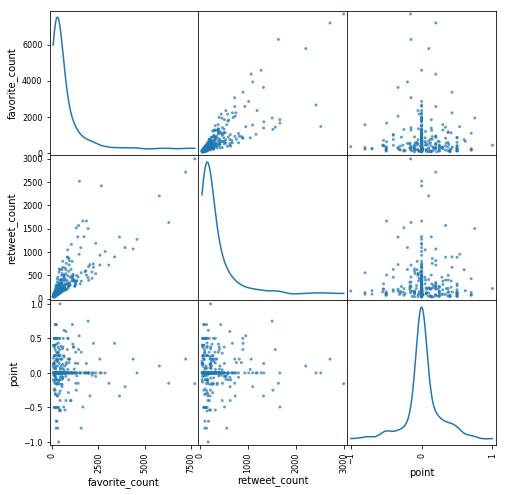

In [169]:
cnnCleandf=pd.read_csv('cnn_cleaned.csv')








####Need to clean the CNN dataset, because we want to have the same time length for each dataset
cnnCleandf=cnnCleandf.iloc[0:364]





print('----------------------------------------------------------------------')
print("correlation between all the pairs of these quantity variables for CNN Dataset:")
print(cnnCleandf[['favorite_count','retweet_count','point']].corr())




print('----------------------------------------------------------------------')
print("Plot the Scatterplot Subplots:")
###### Plot the Scatterplot Subplots:

names2= ['favorite_count','retweet_count','point']

cnnCleandf = cnnCleandf[names2]

scatter_matrix(cnnCleandf, alpha=0.7, figsize=(8, 8),diagonal='kde')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By looking at the table and the subplot above, variable “favorite_count” and variable “retweet_count” are highly correlated with almost a strong positive relationship, which means that one variable increases while the other increases at the same time. On the other hand, since the correlation coefficient is -0.00083 for variable “point” and variable “favorite_count”, therefore those two variables do not have a correlational association of any kind. Similar to other datasets, linear relationship and non-linear relationship can be observed by the presences of scatterplot’s subplots. In this scatterplot subplots, only variable “favorite_count” and “retweet_count” are correlated, and the diagonal plots show the distribution of each variable.

# 4.Looking for Hypothesis
## 4.1-Sentiment Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this research we want to find out the relation between headline news and stock market. To do this, we must get quantitative opinions of each headline news. Then we applied sentiment analysis in our research. We used a python library, TextBlob, to do this analysis in our project. TextBlob gave each headline news a score based on its opinion. The range of the score is -1 to 1, from the most negative opinion to the most positive opinion. Then we calculated each day's combined sentiment score by this function: $\sum_{daily}(\frac{favorite\_count+retweet\_count}{\sum_{daily}\space\space favorite\_count+retweet\_count}\times TextBlob\_point)$, which combined daily news' sentiment score according to their weight of favorite count and retweet count.


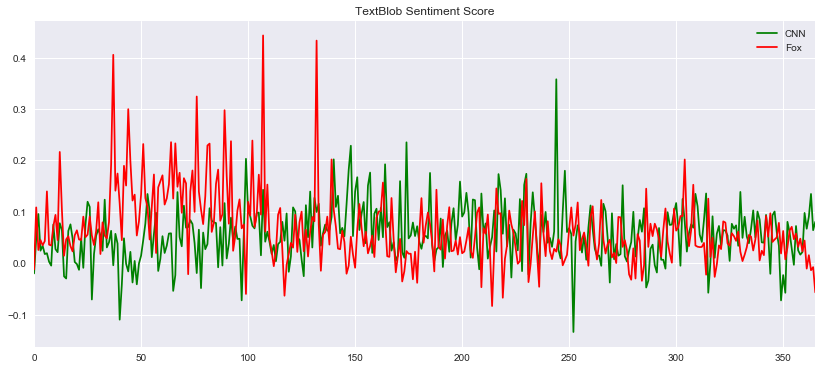

In [203]:
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.lines as mlines
point=pd.read_csv('NewsCombined.csv')
plt.figure(figsize=(14,6))
ax = sns.tsplot(point['CNNPoints'],color='green')
ax = sns.tsplot(point['FoxNewsPoints'],color='red')
ax.set_title('TextBlob Sentiment Score')
handles, labels = ax.get_legend_handles_labels()
cnn = mlines.Line2D([], [], color='green',
                          markersize=15, label='CNN')
fox = mlines.Line2D([], [], color='red',
                          markersize=15, label='Fox')
plt.legend(handles=[cnn,fox])

plt.show()

### Results Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the graph we can find that most daily sentiment score of CNN and Fox news are positive, which means good news are the main trend for both news providers. But we can also find that two lines are not totally coincident,which means different news providers have different opinion towards our daily events. 

## 4.2-Clustering Analysis of Stocks
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To find out the parttern of stock data's convergence and inspiration for further research, we used clustering analysis. In the Cluster Analysis, 3 cluster analyses were used to cluster the stock data. Three functions “KMEANS”“HIERAR”and “DBS”were defined in our code to do the k-means partition clustering, hierarchical clustering and dbscan clustering. Those function will return the cluster labels and silhouette score as a list and print the silhouette score and give out a scatter plot if the parameter verbose were set True.
For the stock data, the price data is highly depending on the time. Though the price will be fluctuant in a short term, it will keep increasing in a long term. If the stock is clustered based on price data, the result will turn out with all first half stock data labeled 0 and the other labeled 1, which is meaningless. So volume, difference of open and close price and increasing rate were used as the standards to cluster stock data, since those variables are less depending on time. 
Then the function “findbestpara”was difined to find the parameters leads to the highest silhouette score for our 3 cluster methods. After that, the parameters founded were used to do the three clustering for the 2 stock data. The program generated two csv files with 3 types of clustering labels.

****************************** Cluster Analysis Result *******************************

nasdaq
Kmeans: For n_clusters = 2 The average silhouette_score is : 0.395592318151


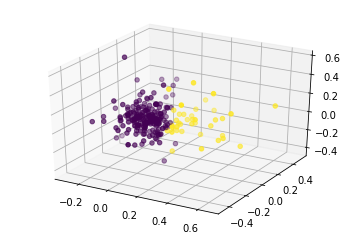

Hierarchical: For n_clusters = 2 The average silhouette_score is : 0.507555669286


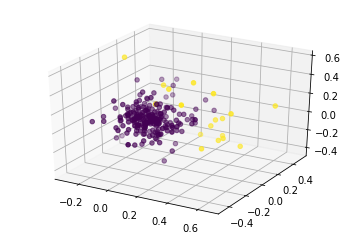

DBscan: For n_clusters = 1 The average silhouette_score is : 0.604403367982


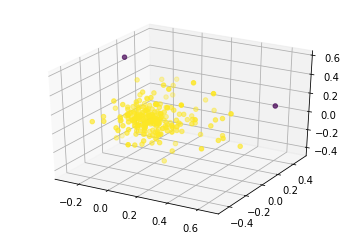

sp500
Kmeans: For n_clusters = 2 The average silhouette_score is : 0.258684021215


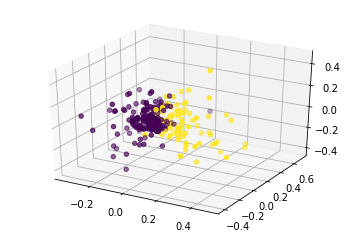

Hierarchical: For n_clusters = 2 The average silhouette_score is : 0.282491923844


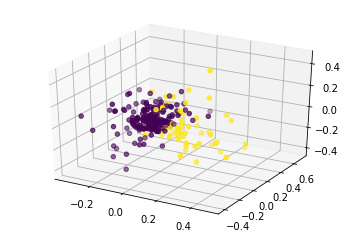

DBscan: For n_clusters = 1 The average silhouette_score is : 0.637286558778


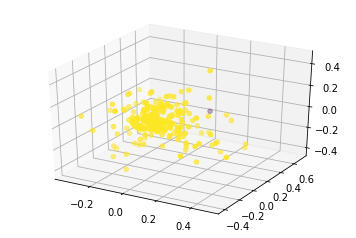

****************************** Cluster Analysis Result end ***************************


In [67]:
print("****************************** Cluster Analysis Result *******************************")
print()
#read all data
fdf=pd.read_csv('FoxNews_cleaned.csv')
cdf=pd.read_csv('CNN_cleaned.csv')
idf=pd.read_csv('ixic_cleaned.csv')#nasdaq
godf=pd.read_csv('gold_cleaned.csv')
gsdf=pd.read_csv('gspc_cleaned.csv')#sp500

#function to do the kmeans clustering. It return a list of labels and  silhouette_score
#k is number of culster
#myData is the data we used to do the clustering
#verbose is a boolean value, if True it will print the silhouette_score and give a plot
def KMEANS(k,myData,verbose):
	
	
	x = myData.values #returns a numpy array
	min_max_scaler = preprocessing.MinMaxScaler()
	x_scaled = min_max_scaler.fit_transform(x)
	normalizedDataFrame = pd.DataFrame(x_scaled)
	
	kmeans = KMeans(n_clusters=k).fit(normalizedDataFrame)
	labels=kmeans.labels_ 
	# Determine if the clustering is good
	silhouette_avg = silhouette_score(normalizedDataFrame, labels)
	
	if verbose==True:
		print("Kmeans: For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)
		fig = plt.figure()
		ax = fig.add_subplot(111, projection='3d')
		#####
		# PCA
		# Let's convert our high dimensional data to 3 dimensions
		# using PCA
		pca3D = decomposition.PCA(3)

		# Turn the data into three columns with PCA
		plot_columns = pca3D.fit_transform(normalizedDataFrame)

		# Plot using a scatter plot and shade by cluster label
		ax.scatter(xs=plot_columns[:,0], ys=plot_columns[:,1],zs=plot_columns[:,2], c=labels)
		
		plt.show()
	return [labels,silhouette_avg]

#function to do the hierarchical clustering. It return a list of labels and  silhouette_score
#k is number of culster
#myData is the data we used to do the clustering
#verbose is a boolean value, if True it will print the silhouette_score and give a plot
def HIERAR(k,myData,verbose):
	
	
	x = myData.values #returns a numpy array
	min_max_scaler = preprocessing.MinMaxScaler()
	x_scaled = min_max_scaler.fit_transform(x)
	normalizedDataFrame = pd.DataFrame(x_scaled)
	ward = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(normalizedDataFrame)
	labels=ward.labels_
	# Determine if the clustering is good
	silhouette_avg = silhouette_score(normalizedDataFrame, labels)
	
	if verbose==True:
		print("Hierarchical: For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)
		fig = plt.figure()
		ax = fig.add_subplot(111, projection='3d')
		#####
		# PCA
		# Let's convert our high dimensional data to 3 dimensions
		# using PCA
		pca3D = decomposition.PCA(3)

		# Turn the data into three columns with PCA
		plot_columns = pca3D.fit_transform(normalizedDataFrame)

		# Plot using a scatter plot and shade by cluster label
		ax.scatter(xs=plot_columns[:,0], ys=plot_columns[:,1],zs=plot_columns[:,2], c=labels)
		#plt.savefig("scatter plot ")
		
		plt.show()
	return [labels,silhouette_avg]


#function to do the DBscan clustering. It return a list of labels and  silhouette_score
#myData is the data we used to do the clustering
#verbose is a boolean value, if True it will print the silhouette_score and give a plot
#eps and min_samples are parameters for DBSCAN and they have decault value of 0.1 and 5
def DBS(myData,verbose,eps=0.1,min_samples=5):
	
	
	x = myData.values #returns a numpy array
	min_max_scaler = preprocessing.MinMaxScaler()
	x_scaled = min_max_scaler.fit_transform(x)
	normalizedDataFrame = pd.DataFrame(x_scaled)
	db = DBSCAN(eps, min_samples).fit(normalizedDataFrame)
	labels=db.labels_
	n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
	# Determine if the clustering is good
	silhouette_avg = silhouette_score(normalizedDataFrame, labels)
	
	
	if verbose==True:
		print("DBscan: For n_clusters =", n_clusters_, "The average silhouette_score is :", silhouette_avg)	
		fig = plt.figure()
		ax = fig.add_subplot(111, projection='3d')
		#####
		# PCA
		# Let's convert our high dimensional data to 3 dimensions
		# using PCA
		pca3D = decomposition.PCA(3)

		# Turn the data into three columns with PCA
		plot_columns = pca3D.fit_transform(normalizedDataFrame)

		# Plot using a scatter plot and shade by cluster label
		ax.scatter(xs=plot_columns[:,0], ys=plot_columns[:,1],zs=plot_columns[:,2], c=labels)
		
		
		plt.show()
	return [labels,silhouette_avg]


#convert our stock data and leave the three values we will use in our clustering
idf['nas_rate'] = idf['adjusted_close'].diff()/idf['adjusted_close']
idf=idf.dropna()
idf['diff']=idf['close']-idf['open']
idf=idf[['diff','volume','nas_rate']]
idf=idf.dropna()

gsdf['sp5_rate'] = gsdf['adjusted_close'].diff()/gsdf['adjusted_close']
gsdf=gsdf.dropna()
gsdf['diff']=gsdf['close']-gsdf['open']
gsdf=gsdf[['diff','volume','sp5_rate']]
gsdf=gsdf.dropna()



print('nasdaq')
iKMlables=KMEANS(2,idf,True)[0]
iHIlables=HIERAR(2,idf,True)[0]
iDBlables=DBS(idf,True,0.3,2)[0]


idf['KMlables']=iKMlables
idf['HIlables']=iHIlables
idf['DBlables']=iDBlables

print('sp500')
gKMlables=KMEANS(2,gsdf,True)[0]
gHIlables=HIERAR(2,gsdf,True)[0]
gDBlables=DBS(gsdf,True,0.3,2)[0]


gsdf['KMlables']=gKMlables
gsdf['HIlables']=gHIlables
gsdf['DBlables']=gDBlables
idf.to_csv('nas-cluster.csv')
gsdf.to_csv('sp5-cluster.csv')
print("****************************** Cluster Analysis Result end ***************************")

### Results Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the two csv files [nas-cluster.csv](https://drive.google.com/a/georgetown.edu/file/d/12Fgm_akgN-n0V_48x6byq3lQejt5ZNPU/view?usp=sharing) and [sp5-cluster](https://drive.google.com/a/georgetown.edu/file/d/1YVRYlb9j2zF6nEecjemh3_QGaSoNZ-26/view?usp=sharing) generated by python code, many fun facts can be found. 1. Dbscan not did good to cluster this kind of data, but it handled the noise better than other methods. Because the result of dbscan has only one cluster but it is the only method generating noise points. From the generated csv, it is obvious that the points with -1 label having at least one abnormally large or small parameter. 2. k-means clustering, hierarchical clustering can’t handle noise, because they can’t label noise. In most condition, kmeans and hierarchical clustering will give same point the same label. This may because those two clustering method are both clustering points by distance. 3. From the csv generated, we have an interesting finding that most 1 labeled point are the turning point for increasing rate, which means the increasing rate of Nasdaq started turning form increasing to decreasing or from decreasing to increasing after the 1 labeled point.
When silhouette score was used to access the quality of the clusters, follow results were obtained. Nasdaq: Kmeans: 0.40, Hierarchical:0.51, DBscan:0.60. SP500: Kmeans:0.29, Hierarchical: 0.28, DDscan:0.64. The score of Kmeans and Hierarchical are lower, because there is noise in this data, Kmeans and Hierarchical can’t handle noise well.
Then the scatter graphs were plotted. From the graph, it is obvious that Kmeans and Hierarchical have almost the same scatter plots. DBscan plot labeled the outlier points but it only generated 1 cluster. 

## 4.3- Association Rule Mining
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the Association Rules part. To find out the possible relation between one day’s CNN, Fox news’ sentiment score and the next day’s Nasdaq, SP500’s increasing rate, all of those four columns were combined into one data frame. Because association rule can’t handle continuous variable, so the first step of the analysis was to bin the four columns according to positive and negative values. In the data binning,“cneg”was used to label CNN news with a negative sentiment score，“cpos”was used to label CNN news with a positive sentiment score. Similarly, “fneg” and“fpos”means certain day’s Fox news has a negative or positive sentiment score. “nasde”was used to label Nasdaq with a negative increasing rate, “nasin”was used to label Nasdaq with a positive increasing rate. Similarly, “sp5de”and “sp5in“ means certain day’s SP500 has a negative and positive increasing rate.  



In [68]:

print("****************************** Association Rules Results *******************************")
print()

#read all data again
fdf=pd.read_csv('FoxNews_cleaned.csv')
cdf=pd.read_csv('CNN_cleaned.csv')
idf=pd.read_csv('ixic_cleaned.csv')#nasdaq
godf=pd.read_csv('gold_cleaned.csv')
gsdf=pd.read_csv('gspc_cleaned.csv')#sp500




#Here is the function to calculate the sentimental test score for everyday, 
#by the formula: 
#sumperday([(favorite_count+retweet_count)/sumperday(favorite_count+retweet_count)]*point)=result
def combinpoint(df):
    df['New'] = df['favorite_count']+df['retweet_count']
    Group = df.groupby('created_at')

    def func(x):
        x['New2'] = x['New']/x['New'].sum()
        x['result'] = x['New2']*x['point']
        return x['result'].sum()

    temp = Group.apply(func)

    dic = {"Date":df['created_at'].unique(),
            "Result": temp.tolist()}
    try:
        NewData = pd.DataFrame(data=dic)
    except:
        NewData=None
    return NewData


#function to change the date format
def regudate (of):

	dt = datetime.strptime(of, '%Y/%m/%d')
	return(dt.strftime('%Y-%m-%d'))

fdf["created_at"]=fdf.created_at.apply(lambda x: regudate(x) )
cdf["created_at"]=cdf.created_at.apply(lambda x: regudate(x) )

#function to add increase_rate column to stock data
def addrate(d):
	d['increase_rate'] = d['adjusted_close'].diff()/d['adjusted_close']
	d=d.dropna()
	return d

#add increase_rate column to nasdaq data
idf['nas_rate'] = idf['adjusted_close'].diff()/idf['adjusted_close']
idf=idf.dropna()
#add increase_rate column to sp500 data
gsdf['sp_rate'] = gsdf['adjusted_close'].diff()/gsdf['adjusted_close']
gsdf=gsdf.dropna()
#keep useful columns and delete all others
idf=idf[['timestamp','nas_rate']]
gsdf=gsdf[['timestamp','sp_rate']]

#calculate per day sentimental test socre for cnn news
cnn=combinpoint(cdf)
#keep useful rows of cnn news
cnn=cnn.iloc[0:364]
#keep useful columns and delete all others
cnn.columns=['Date','cnnpoints']

#calculate per day sentimental test socre for fox news
fox=combinpoint(fdf)
#keep useful columns and delete all others
fox.columns=['Date','foxpoints']
#combine useful columns by date
news=cnn.join(fox.set_index('Date'),on='Date')
df=idf.join(news.set_index('Date'),on='timestamp')
df=gsdf.join(df.set_index('timestamp'),on='timestamp')
df = df[np.isfinite(df['cnnpoints'])]
df = df[np.isfinite(df['foxpoints'])]
#use only 4 columns
df=df[['cnnpoints','foxpoints','nas_rate','sp_rate']]
#generate csv for further use
df.to_csv('clean-combined.csv')
#binning news by positive and negative. binning stocks by increasing and decreasing
df['cnn']=pd.cut(df.cnnpoints,bins=[-1.1,0,1],labels=['cneg','cpos'])
df['fox']=pd.cut(df.foxpoints,bins=[-1.1,0,1],labels=['fneg','fpos'])
df['nas']=pd.cut(df.nas_rate,bins=[-1.1,0,1],labels=['nasde','nasin'])
df['sp5']=pd.cut(df.sp_rate,bins=[-1.1,0,1],labels=['sp5de','sp5in'])
df=df[['cnn','fox','nas','sp5']]
df.cnn=df.cnn.shift(-1)#Let's consider last day's cnn news' effect on one day's stock increase rate
df.fox=df.fox.shift(-1)#Let's consider last day's fox news' effect on one day's stock increase rate
df=df.dropna()
#generate value array
transactions = df.values
#do the associated rule test
results = pd.DataFrame(apriori(transactions))
results=results[results['support']>=0.3].reset_index()#let minSupport=0.3
results=results[['items','support']]
print(results)
print("****************************** Association Rules Results end ***************************")

****************************** Association Rules Results *******************************

                         items   support
0                       (cpos)  0.839357
1                       (fpos)  0.903614
2                      (nasde)  0.598394
3                      (nasin)  0.401606
4                      (sp5de)  0.554217
5                      (sp5in)  0.445783
6                 (fpos, cpos)  0.746988
7                (nasde, cpos)  0.502008
8                (nasin, cpos)  0.337349
9                (sp5de, cpos)  0.457831
10               (sp5in, cpos)  0.381526
11               (fpos, nasde)  0.534137
12               (fpos, nasin)  0.369478
13               (fpos, sp5de)  0.485944
14               (fpos, sp5in)  0.417671
15              (nasde, sp5de)  0.502008
16              (sp5in, nasin)  0.349398
17         (fpos, nasde, cpos)  0.441767
18         (fpos, nasin, cpos)  0.305221
19         (fpos, sp5de, cpos)  0.393574
20         (fpos, sp5in, cpos)  0.353414
21      

### Results Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After the associate rules analysis (minsupport=0.3), result as graph below was generated. From the result, many interesting facts were obtained. 1. The main trend of CNN news and Fox news were positive. Because the result showed the support of“(cpos)”is 0.84 and “(fpos)”is 0.9.  2. The support of (cpos,fpos) is 0.75, which means there was a high possibility that CNN and Fox news both reported overall positive news in the same day. 4. There were almost no effect of certain day’s overall news’sentiment score to next day’s Nasdaq and Sp500 increasing rate. Because row 17 and 18, 19 and 20 in the result almost have the same support, which means the positive or negative sentiment score of CNN and Fox news don’t affect the increasing or decreasing of Nasdaq and Sp500.

## 4.4-Additional Analysis - Topic modeling
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Different news topics may have different effect on stock market. To study this, another analysis was done in this research. The CNN News and Fox News data were scripted from Twitter, so they didn’t come with a topic label. To find out the topic of each tweet, the topic modeling analysis was used in this step. Python’s Scikit learn package was used to calculate the term frequency–inverse document frequency. The reason why term frequency–inverse document frequency was used while not term frequency only is because articles and conjunction are abused in most tweets. And tf-idf can diminish the weight of terms that occur very frequently in the document set and increase the weight of terms that occur rarely. Then k-means clustering was used again to cluster tweets in 5 groups by their topics according to the tf-idf matrix. Then we give each day a sentimental score. Then the correlation between each group of news and increase rate of each two stock index were calculated.

In [70]:
np.random.seed(12345)
print("****************************** Topic Modeling Results *******************************")
print()

#read all data again
fdf=pd.read_csv('FoxNews_cleaned.csv')
cdf=pd.read_csv('CNN_cleaned.csv')


idf=pd.read_csv('ixic_cleaned.csv')#nasdaq
gsdf=pd.read_csv('gspc_cleaned.csv')#sp500




################################## modeling #############################################


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic " + str(topic_idx))
        #print (topic.argsort())
        print (" "+str([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

documents = cdf['text'].tolist()
documents1 = fdf['text'].tolist()



no_features = 1000

# tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()



num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()


cdf['topic']=clusters
#cdf.to_csv('cnn_topic.csv')





#cnn.to_csv("cnn_topic.csv")

tfidf_vectorizer1 = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf1 = tfidf_vectorizer1.fit_transform(documents1)

tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()



km1 = KMeans(n_clusters=num_clusters)
km1.fit(tfidf1)
clusters = km1.labels_.tolist()


fdf['topic']=clusters
#fdf.to_csv('fox_topic.csv')






print("CNN News Top terms per topic:")

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
#print(order_centroids)


random.seed(12345)

for i in range(num_clusters):
    print()
    print("Topic",i+1, "words: ")
    for ind in order_centroids[i, :10]: #replace 6 with n words per cluster		
        print(tfidf_feature_names[ind]," ", end='')
print()
print()
print("Fox News Top terms per topic:")
order_centroids1 = km1.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print()
    print("Topic",i+1, "words: ")
    for ind in order_centroids1[i, :10]: #replace 6 with n words per cluster
        print(tfidf_feature_names1[ind]," ",end='')
#cdf=pd.read_csv('cnn_topic.csv')
#fdf=pd.read_csv('fox_topic.csv')




################################## topic ################################################
cdf0=cdf[cdf['topic']==0]
cdf1=cdf[cdf['topic']==1]
cdf2=cdf[cdf['topic']==2]
cdf3=cdf[cdf['topic']==3]
cdf4=cdf[cdf['topic']==4]


fdf0=fdf[fdf['topic']==0]
fdf1=fdf[fdf['topic']==1]
fdf2=fdf[fdf['topic']==2]
fdf3=fdf[fdf['topic']==3]
fdf4=fdf[fdf['topic']==4]










#Here is the function to calculate the sentimental test score for everyday, 
#by the formula: 
#sumperday([(favorite_count+retweet_count)/sumperday(favorite_count+retweet_count)]*point)=result
def combinpoint(df):
    df['New'] = df['favorite_count']+df['retweet_count']
    Group = df.groupby('created_at')

    def func(x):
        x['New2'] = x['New']/x['New'].sum()
        x['result'] = x['New2']*x['point']
        return x['result'].sum()

    temp = Group.apply(func)

    dic = {"Date":df['created_at'].unique(),
            "Result": temp.tolist()}
    try:
        NewData = pd.DataFrame(data=dic)
    except:
        NewData=None
    return NewData


#function to change the date format
def regudate (of):

	dt = datetime.strptime(of, '%Y/%m/%d')
	return(dt.strftime('%Y-%m-%d'))

fdf["created_at"]=fdf.created_at.apply(lambda x: regudate(x) )
cdf["created_at"]=cdf.created_at.apply(lambda x: regudate(x) )


cdf0["created_at"]=cdf0.created_at.apply(lambda x: regudate(x) )
cdf1["created_at"]=cdf1.created_at.apply(lambda x: regudate(x) )
cdf2["created_at"]=cdf2.created_at.apply(lambda x: regudate(x) )
cdf3["created_at"]=cdf3.created_at.apply(lambda x: regudate(x) )
cdf4["created_at"]=cdf4.created_at.apply(lambda x: regudate(x) )

fdf0["created_at"]=fdf0.created_at.apply(lambda x: regudate(x) )
fdf1["created_at"]=fdf1.created_at.apply(lambda x: regudate(x) )
fdf2["created_at"]=fdf2.created_at.apply(lambda x: regudate(x) )
fdf3["created_at"]=fdf3.created_at.apply(lambda x: regudate(x) )
fdf4["created_at"]=fdf4.created_at.apply(lambda x: regudate(x) )

#function to add increase_rate column to stock data
def addrate(d):
	d['increase_rate'] = d['adjusted_close'].diff()/d['adjusted_close']
	d=d.dropna()
	return d




#add increase_rate column to nasdaq data
idf['nas_rate'] = idf['adjusted_close'].diff()/idf['adjusted_close']
idf=idf.dropna()
#add increase_rate column to sp500 data
gsdf['sp_rate'] = gsdf['adjusted_close'].diff()/gsdf['adjusted_close']
gsdf=gsdf.dropna()
#keep useful columns and delete all others
idf=idf[['timestamp','nas_rate']]
gsdf=gsdf[['timestamp','sp_rate']]



def gefinaldata(newsdf,idf,gsdf):
	newsdf=combinpoint(newsdf)
	df=idf.join(newsdf.set_index('Date'),on='timestamp')
	df=gsdf.join(df.set_index('timestamp'),on='timestamp')
	return df
	
cnn0=gefinaldata(cdf0,idf,gsdf).dropna()
cnn1=gefinaldata(cdf1,idf,gsdf).dropna()
cnn2=gefinaldata(cdf2,idf,gsdf).dropna()
cnn3=gefinaldata(cdf3,idf,gsdf).dropna()
cnn4=gefinaldata(cdf4,idf,gsdf).dropna()

fox0=gefinaldata(fdf0,idf,gsdf).dropna()
fox1=gefinaldata(fdf1,idf,gsdf).dropna()
fox2=gefinaldata(fdf2,idf,gsdf).dropna()
fox3=gefinaldata(fdf3,idf,gsdf).dropna()
fox4=gefinaldata(fdf4,idf,gsdf).dropna()

print()
print("CNN topic1 vs S&P500")
print(cnn0['sp_rate'].corr(cnn0['Result']))
print("CNN topic1 vs nasdaq")
print(cnn0['nas_rate'].corr(cnn0['Result']))
print()
print("CNN topic2 vs S&P500")
print(cnn1['sp_rate'].corr(cnn1['Result']))
print("CNN topic2 vs nasdaq")
print(cnn1['nas_rate'].corr(cnn1['Result']))
print()
print("CNN topic3 vs S&P500")
print(cnn2['sp_rate'].corr(cnn2['Result']))
print("CNN topic3 vs nasdaq")
print(cnn2['nas_rate'].corr(cnn2['Result']))
print()
print("CNN topic4 vs S&P500")
print(cnn3['sp_rate'].corr(cnn3['Result']))
print("CNN topic4 vs nasdaq")
print(cnn3['nas_rate'].corr(cnn3['Result']))
print()
print("CNN topic5 vs S&P500")
print(cnn4['sp_rate'].corr(cnn4['Result']))
print("CNN topic5 vs nasdaq")
print(cnn4['nas_rate'].corr(cnn4['Result']))
print()

print("Fox topic1 vs S&P500")
print(fox0['sp_rate'].corr(fox0['Result']))
print("Fox topic1 vs nasdaq")
print(fox0['nas_rate'].corr(fox0['Result']))
print()
print("Fox topic2 vs S&P500")
print(fox1['sp_rate'].corr(fox1['Result']))
print("Fox topic2 vs nasdaq")
print(fox1['nas_rate'].corr(fox1['Result']))
print()
print("Fox topic3 vs S&P500")
print(fox2['sp_rate'].corr(fox2['Result']))
print("Fox topic3 vs nasdaq")
print(fox2['nas_rate'].corr(fox2['Result']))
print()
print("Fox topic4 vs S&P500")
print(fox3['sp_rate'].corr(fox3['Result']))
print("Fox topic4 vs nasdaq")
print(fox3['nas_rate'].corr(fox3['Result']))
print()
print("Fox topic5 vs S&P500")
print(fox4['sp_rate'].corr(fox4['Result']))
print("Fox topic5 vs nasdaq")
print(fox4['nas_rate'].corr(fox4['Result']))
print("****************************** Topic Modeling Results end ***************************")


****************************** Topic Modeling Results *******************************

CNN News Top terms per topic:

Topic 1 words: 
says  trump  president  official  donald  people  korea  north  clinton  sen  
Topic 2 words: 
trump  president  donald  clinton  obama  hillary  campaign  elect  administration  ban  
Topic 3 words: 
house  white  trump  press  president  speaker  says  briefing  obama  secretary  
Topic 4 words: 
world  people  year  police  say  just  years  man  realdonaldtrump  clinton  
Topic 5 words: 
new  york  study  trump  according  poll  year  report  says  shows  

Fox News Top terms per topic:

Topic 1 words: 
trump  says  new  police  north  amp  korea  say  hillaryclinton  house  
Topic 2 words: 
people  american  potus  want  don  going  country  amp  realdonaldtrump  need  
Topic 3 words: 
potus  going  amp  america  american  think  media  president  ve  flotus  
Topic 4 words: 
news  fox  channel  tune  breaking  et  poll  alert  tonight  coverage  
T

### Results Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The result shows that all correlations are less than 0.2, which means the sentimental score of news and the increase rate of stock index have little correlation. But we can find that CNN topic 1 has a relatively high correlation with both SP&500 and nasdaq's increase rate. The top terms of topic 1 shows that this is a topic about Trump's words about North Korea. We know that Trump's words on North Korea are always threaten words like "totally destroy north korea", which may boost the stock prices of the Aerospace & Defense Industry. We know there are many companies within SP&500 and nasdaq belonging to Aerospace & Defense Industry. So it is easily to understand why this topic has a relatively high correlation with stock index's increase rate.

# 5 Hypothesis Test
## 5.1-Final Data
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;At this point, all the data has been collected and cleaned. For the News data, number of favorites, number of retweets, date, text contents and text blog points have been kept for the analysis in the next step. For the stock market data, date, open price, high price, low price, close price, adjusted close price and volume have been kept, and one more column “increase rate” has been added to the data to express the changing rate.

## 5.2-Hypothesis One: Relationship inside each News' data
<br>**Null Hypothesis:TextBlob points do not have linear relationship with variable “favorites” and variable “retweets”.**
<br>**Alternative Hypothesis: TextBlob points do have linear relationshipp with variable "favorites" and variable "retweets".**
<br>**Method: Linear Regression Test.**
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the Hypothesis part, we have chosen three different hypothesis tests to figure out our primary goal of the project step by step. In the first hypothesis test, we tried to figure out some relationship inside news. Since the news dataset came from Tweet, it contained some other interesting variables such as favorites and retweets. Although the main measurement in this project for the tweets is the TextBlob points, it can be interesting to find out any other factors that may have linear relationship with the TextBlob points. Linear Regression is used to model the relationship between two variables by do the linear approaching. In general, if the number of the retweets and favorites is very high, it means a lot of are agree with the opinions and attitudes. If there is cause relationship or linear relationship between the TextBlob points and number of favorites and retweets, it means people trust and agree with the news resources, which also make the news themselves reliable when we do the following analysis. So, the first hypothesis in this project is that TextBlob point does not have linear relationship with variable “favorites” and variable “retweets”.

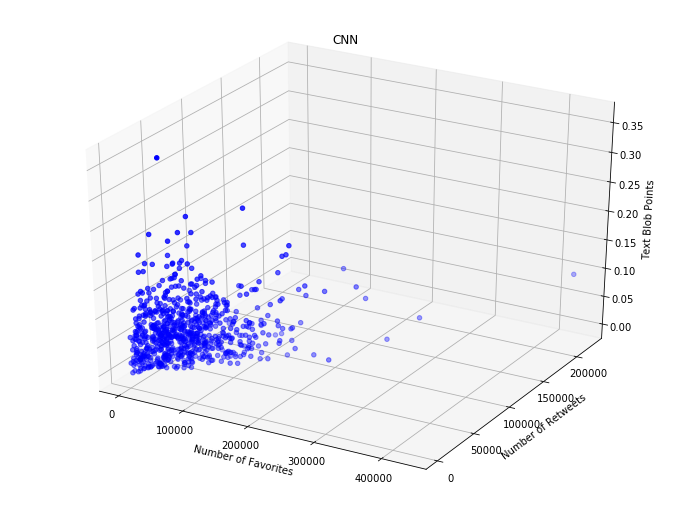

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
df = pd.read_csv("CNN_test2.csv")
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
# Make data.
X = df["Favorites"]
Y = df["Retweets"]
#X, Y = np.meshgrid(X, Y)
Z = df["Points"]

# Plot the surface.
ax.scatter(X, Y, Z, c="b", marker = "o")

ax.set_xlabel("Number of Favorites")
ax.set_ylabel("Number of Retweets")
ax.set_zlabel("Text Blob Points")
ax.set_title('CNN')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TextBlob points directly show the positive attitudes or opinions if the points are positive, and show the negative attitudes or opinions if the points are negative. In either way, higher absolute values of the points show the stronger attitudes and opinions. So, the data has been cleaned to show the absolute values of the points, which is proper for this hypothesis test.
 <br>**For CNN:**
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since the p-value is 0.132, which is larger than 0.05, it fails to reject the null hypothesis. Also, we can see from the graph that the blue points were most distributed on the left side corner disorderly. So, the TextBlob points for CNN do not have linear relationship with favorites and retweets.

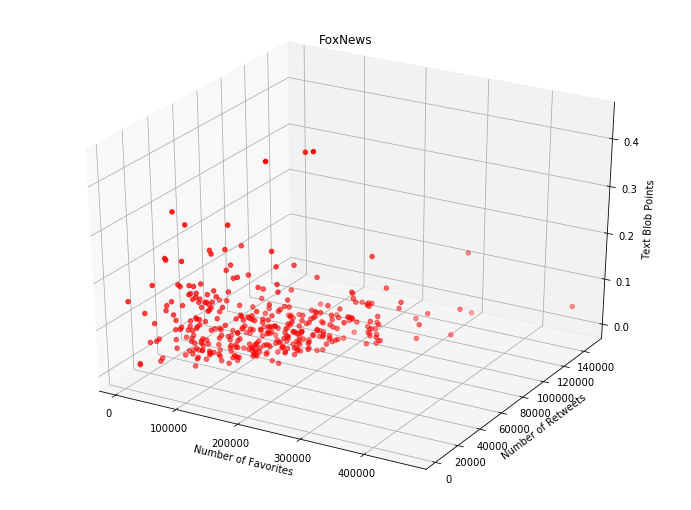

In [96]:
df = pd.read_csv("FoxNews_test2.csv")
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
# Make data.
X = df["Favorites"]
Y = df["Retweets"]
#X, Y = np.meshgrid(X, Y)
Z = df["Points"]

# Plot the surface.
ax.scatter(X, Y, Z, c="r", marker = "o")

ax.set_xlabel("Number of Favorites")
ax.set_ylabel("Number of Retweets")
ax.set_zlabel("Text Blob Points")
ax.set_title('FoxNews')
plt.show()


<br>** For Fox News:**
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since the p-value is 0.000790, which is less than 0.05, it rejects the null hypothesis. Also, we can see from the graph that the red points were most distributed orderly and we can tell the approximately direction of their trend. So, the TextBlob points for Fox News have linear relationship with favorites and retweets. 

## 5.3-Hypothesis Two: Difference between two News Resources
**Null Hypothesis:CNN and FoxNews do not have significant difference between TextBlob points.. **
<br>**Alternative Hypothesis: CNN and FoxNews do have significant difference between TextBlob points.. **
<br>**Method: One-Way ANOVA test.**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After knowing that data from two news resources have different situations inside them, we want to compare and find out whether they have differences in TextBlob points and number of favorites and retweets by directly comparing these variables. Also, these variables are the main measurement that helps determining the relationship in the next test. So, in the second hypothesis test, we used One-Way ANOVA test to find out whether two News have signficant differences in TextBlob points about the things happened at that year.



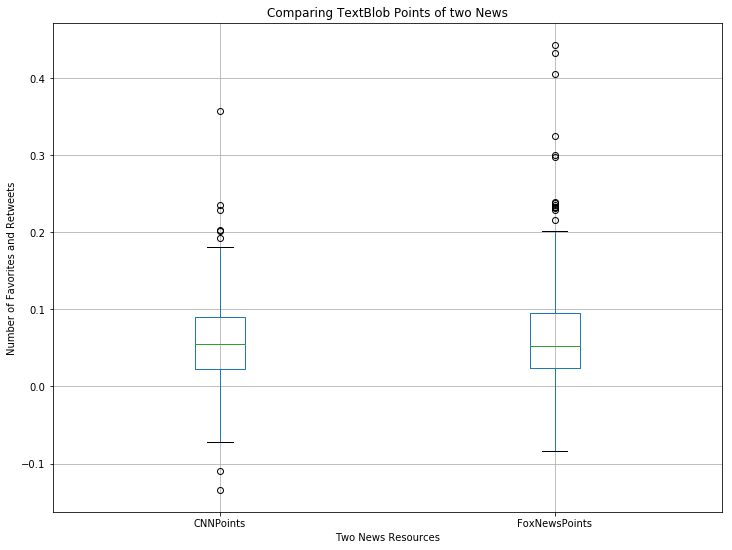

In [103]:
df = pd.read_csv("NewsCombined.csv")
fig2 = plt.figure(figsize=(12,9))
ax = df.boxplot(column = ['CNNPoints', 'FoxNewsPoints'])
ax.set_title("Comparing TextBlob Points of two News")
ax.set_ylabel("Number of Favorites and Retweets")
ax.set_xlabel("Two News Resources")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Although the box plot have shown similar results for the TextBlob points, we can still find out that FoxNews are relatively higher a little bit than CNN, and has lee outliers. And since the p-value is less than the significance level, the null hypothesis has been rejected. In other words, CNN and FoxNews have significant difference between TextBlob points, which shows that they have significant different opinions and attitudes to the news and events that happened last year.

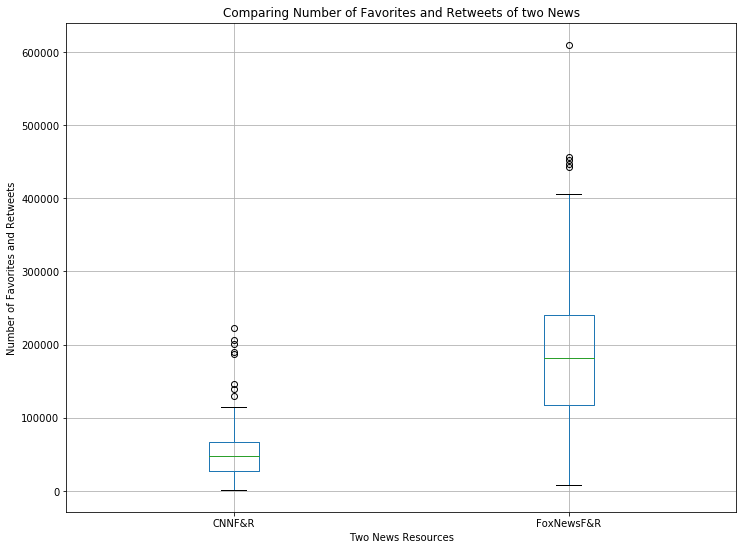

In [102]:
df = pd.read_csv("NewsCombined.csv")
fig1 = plt.figure(figsize=(12,9))
ax = df.boxplot(column = ['CNNF&R', 'FoxNewsF&R'])
ax.set_title("Comparing Number of Favorites and Retweets of two News")
ax.set_ylabel("Number of Favorites and Retweets")
ax.set_xlabel("Two News Resources")
plt.show()


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the graph, we can see that there is signficant difference in the number of favorites and retweets between CNN and FoxNews. After doing the One-Way Anova test, the result is as we expected that rejects the null hypothesis. So, there is signficant difference in number of favorites and retweets.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After doing the second hypothesis test, we have fully understand that CNN and FoxNews are completely two different resources. 
They have different opinions and atttitudes about he events happened during the year.
The difference in the number of favorites and retweets also shows that people have different identifiation for two news.



## 5.4-Hypothesis Three: Relationship between News and Stock Market
<br>**Null Hypothesis:CNN and FoxNews do not have influences on the changes of the stock market price. **
<br>**Alternative Hypothesis: CNN and FoxNews do have influences on the changes of the stock market price. **
<br>**Method:Five Machine learning prediction models.**
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The third hypothesis of this project is that the tweets of CNN and FoxNews have influences on the changes of the stock market and gold prices. The project is assuming that CNN and FoxNews could predict the increasing or the decreasing situations through the TextBlob points of news headlines. In this way, the project used five supervised machine learning prediction models, which are Decision Tree, KNN, Naïve Bayes, SVM and Random Forest, to test the accuracy of the prediction. These predictive models were chosen for this hypothesis because these models can use the statistics and data provided to predict the outcomes. In other words, these models can directly test the necessary relationship between the variables and final results. If there is necessary relationship, predictive models can get high accuracy score and the results  can be used to predict the future.

<br>**About Five machine learning prediction models.**
<br>**KNN**: KNN means the K-nearest Neighbors, which uses the algorithm to calculate the measurement like distances in order to find the closest training samples to do the classification. 
<br>**Decision Tree**: Decision Tree is the model that contains nodes, which denote several tests to lead to different branches. Each node represents a class label. And after building the tree through the training, it can predict the results of classification by going through the nodes(tests).
<br>**Gaussian Naive Bayes**: Gaussian Naive Bayes: is the model that uses Bayesian theorem. The NB model is very useful if the dimensionality is high, and it will assume that the variables are independent. NB uses a family of algorithms to consider each of features that contribute to the final classification result.
<br>**Support vector machines**: Support vector machines are a set of supervised learning models that uses algorithms to predict the result of classification, regression and even outlier detection.
<br>**RandomForest**: Random Forest is the model that build several trees after learning the training data to generate different classifications. It is like a forest that contains several decision trees, and for each vote on the classification and class with the most votes wins and generate the result.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, we know that CNN and Fox News have differences in attitudes and opinions, and people are willing to trust Fox News	more than CNN. So, we separated the news’s data first to predict the results individually.
<br>**For CNN News:**

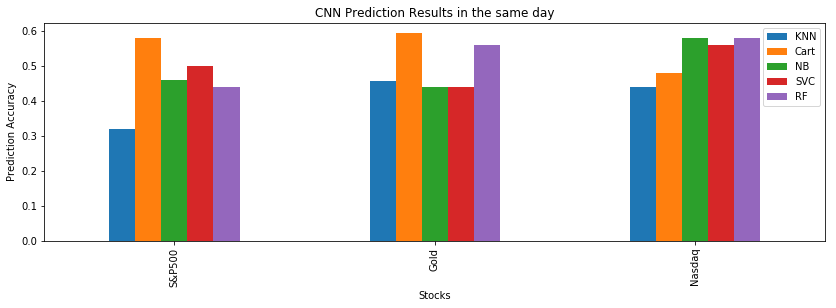

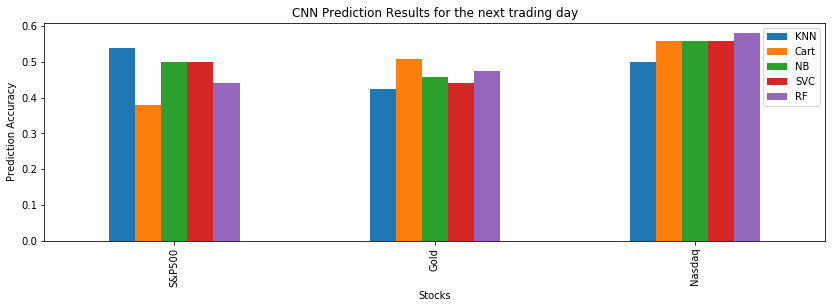

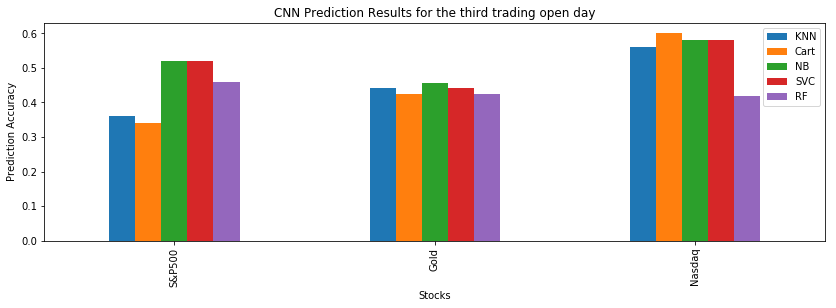

In [132]:
from sklearn import cross_validation

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
def function1(myData):
    valueArray = myData.values
    X = valueArray[:,0:2]
    Y = valueArray[:,2]
    test_size = 0.20
    seed = 7
    X_train, X_validate, Y_train, Y_validate = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)

    num_folds = 10
    num_instances = len(X_train)
    seed = 7
    scoring = 'accuracy'
    
    
    #Normalize the Data
    X = preprocessing.normalize(X)
    
######################################################
# Use different algorithms to build models
######################################################

# Add each algorithm and its name to the model array
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RF',RandomForestClassifier()))
    
# Evaluate each model, add results to a results array,
# Print the accuracy results (remember these are averages and std
    results =[]
    names = []
    for name, model in models:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
  
######################################################
# For the best model, see how well it does on the
# validation test.  This is for KNeighborsClassifier
######################################################
# Make predictions on validation dataset
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validate)
    accuracy = pd.DataFrame()
    accuracy = accuracy.append({'KNN': accuracy_score(Y_validate, predictions)}, ignore_index = True)


######################################################
# For the best model, see how well it does on the
# validation test. This is for DecisionTreeClassifier
######################################################
# Make predictions on validation dataset
    cart = DecisionTreeClassifier()
    cart.fit(X_train, Y_train)
    predictions = cart.predict(X_validate)
    accuracy = accuracy.append({'Cart': accuracy_score(Y_validate, predictions)}, ignore_index = True)

######################################################
# For the best model, see how well it does on the
# validation test. This is for GaussianNB
######################################################
# Make predictions on validation dataset
    nb = GaussianNB()
    nb.fit(X_train, Y_train)
    predictions = nb.predict(X_validate)
    accuracy = accuracy.append({'NB': accuracy_score(Y_validate, predictions)}, ignore_index = True)


######################################################
# For the best model, see how well it does on the
# validation test. This is for SVM
######################################################
# Make predictions on validation dataset
    svm = SVC()
    svm.fit(X_train, Y_train)
    predictions = svm.predict(X_validate)
    accuracy = accuracy.append({'SVC': accuracy_score(Y_validate, predictions)}, ignore_index = True)


######################################################
# For the best model, see how well it does on the
# validation test. This is for RandomForestClassifier
######################################################
# Make predictions on validation dataset
    rf = RandomForestClassifier()
    rf.fit(X_train, Y_train)
    predictions = rf.predict(X_validate)
    accuracy = accuracy.append({'RF': accuracy_score(Y_validate, predictions)}, ignore_index = True)
    accuracy.Cart=accuracy.Cart.shift(-1)
    accuracy.NB=accuracy.NB.shift(-2)
    accuracy.SVC=accuracy.SVC.shift(-3)
    accuracy.RF=accuracy.RF.shift(-4)
    accuracy = accuracy.dropna()
    return accuracy
d1 = pd.read_csv('News_vs_Gspc.csv')
d2 = pd.read_csv('News_vs_Gold.csv')
d3 = pd.read_csv('News_vs_Ixic.csv')
d1.drop('FoxNewsF&R', axis=1, inplace=True)
d1.drop('FoxNewsPoints', axis=1, inplace=True)
d2.drop('FoxNewsF&R', axis=1, inplace=True)
d2.drop('FoxNewsPoints', axis=1, inplace=True)
d3.drop('FoxNewsF&R', axis=1, inplace=True)
d3.drop('FoxNewsPoints', axis=1, inplace=True)
t1 = function1(d1)
t2 = function1(d2)
t3 = function1(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='CNN Prediction Results in the same day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

d1.increase_rateg=d1.increase_rateg.shift(+1)
d2.increase_rate=d2.increase_rate.shift(+1)
d3.increase_ratei=d3.increase_ratei.shift(+1)
d1 = d1.dropna()
d2 = d2.dropna()
d3 = d3.dropna()
t1 = function1(d1)
t2 = function1(d2)
t3 = function1(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='CNN Prediction Results for the next trading day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

d1.increase_rateg=d1.increase_rateg.shift(+1)
d2.increase_rate=d2.increase_rate.shift(+1)
d3.increase_ratei=d3.increase_ratei.shift(+1)
d1 = d1.dropna()
d2 = d2.dropna()
d3 = d3.dropna()
t1 = function1(d1)
t2 = function1(d2)
t3 = function1(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='CNN Prediction Results for the third trading open day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As we can see from the three graphs. Although all the accuracy rates were not very high, decision tree has high accuracy rate for S&P500 and Gold in the same trading after news released. Random forest also has high accuracy for Gold in the same trading. However, in the next trading day and third trading day, accuracy rates have decreased obviously for S&P500 and Gold.

**For Fox News:**

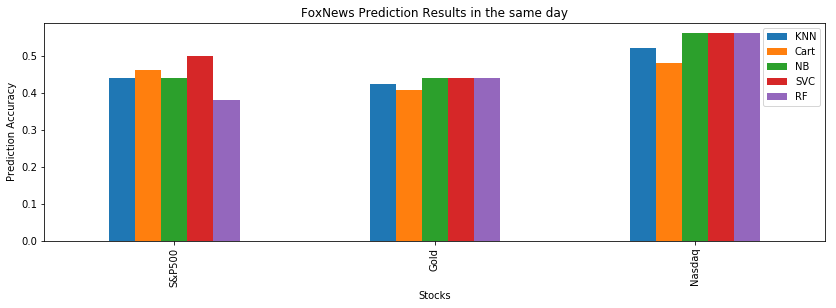

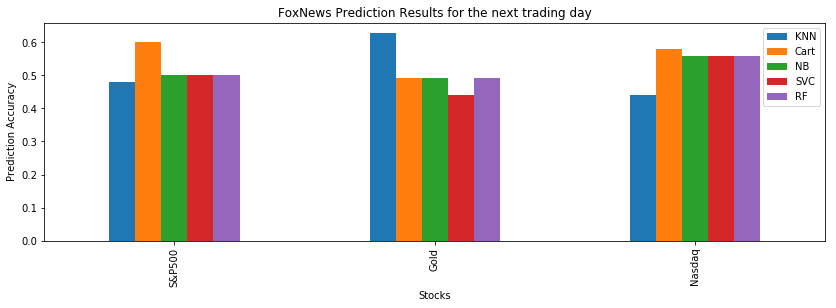

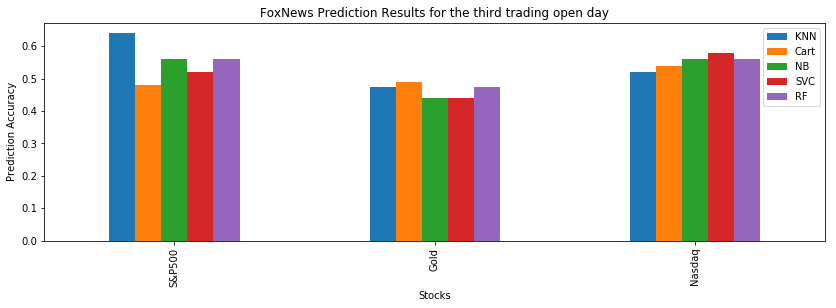

In [131]:
#Fox News
d1 = pd.read_csv('News_vs_Gspc.csv')
d2 = pd.read_csv('News_vs_Gold.csv')
d3 = pd.read_csv('News_vs_Ixic.csv')
d1.drop('CNNF&R', axis=1, inplace=True)
d1.drop('CNNPoints', axis=1, inplace=True)
d2.drop('CNNF&R', axis=1, inplace=True)
d2.drop('CNNPoints', axis=1, inplace=True)
d3.drop('CNNF&R', axis=1, inplace=True)
d3.drop('CNNPoints', axis=1, inplace=True)
t1 = function1(d1)
t2 = function1(d2)
t3 = function1(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='FoxNews Prediction Results in the same day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

d1.increase_rateg=d1.increase_rateg.shift(+1)
d2.increase_rate=d2.increase_rate.shift(+1)
d3.increase_ratei=d3.increase_ratei.shift(+1)
d1 = d1.dropna()
d2 = d2.dropna()
d3 = d3.dropna()
t1 = function1(d1)
t2 = function1(d2)
t3 = function1(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='FoxNews Prediction Results for the next trading day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

d1.increase_rateg=d1.increase_rateg.shift(+1)
d2.increase_rate=d2.increase_rate.shift(+1)
d3.increase_ratei=d3.increase_ratei.shift(+1)
d1 = d1.dropna()
d2 = d2.dropna()
d3 = d3.dropna()
t1 = function1(d1)
t2 = function1(d2)
t3 = function1(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='FoxNews Prediction Results for the third trading open day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;All the results here do not show very high accuracy rate, but we still found some interesting things about them. Like, KNN have very high accuracy rate for Gold in the next trading day based on Fox News, and KNN have high accuracy rate for S&P500 in the third trading day, and the accuracy rates are relatively higher for Nasdaq in the same day based on Fox News.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results for Fox News is relatively better than CNN. However, the accuracy rates were not high enough to tell there is necessary relationship between the news and stock market.
In order to test all the possibilities, we put two News together to do the prediction tests again.

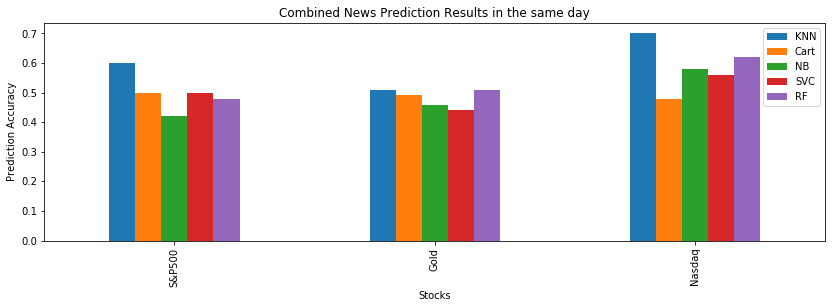

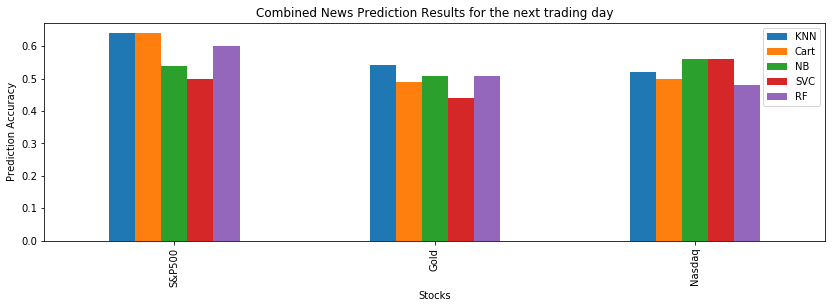

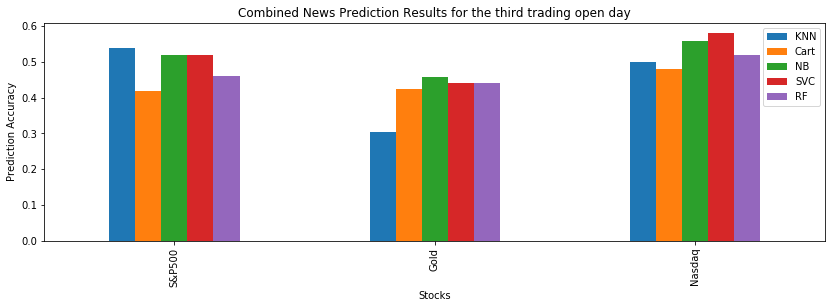

In [130]:
def function(myData):
    valueArray = myData.values
    X = valueArray[:,0:4]
    Y = valueArray[:,4]
    test_size = 0.20
    seed = 7
    X_train, X_validate, Y_train, Y_validate = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)

    num_folds = 10
    num_instances = len(X_train)
    seed = 7
    scoring = 'accuracy'
    
    
    #Normalize the Data
    X = preprocessing.normalize(X)
    
######################################################
# Use different algorithms to build models
######################################################

# Add each algorithm and its name to the model array
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RF',RandomForestClassifier()))
    
# Evaluate each model, add results to a results array,
# Print the accuracy results (remember these are averages and std
    results =[]
    names = []
    for name, model in models:
        kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
        cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
  
######################################################
# For the best model, see how well it does on the
# validation test.  This is for KNeighborsClassifier
######################################################
# Make predictions on validation dataset
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validate)
    accuracy = pd.DataFrame()
    accuracy = accuracy.append({'KNN': accuracy_score(Y_validate, predictions)}, ignore_index = True)


######################################################
# For the best model, see how well it does on the
# validation test. This is for DecisionTreeClassifier
######################################################
# Make predictions on validation dataset
    cart = DecisionTreeClassifier()
    cart.fit(X_train, Y_train)
    predictions = cart.predict(X_validate)
    accuracy = accuracy.append({'Cart': accuracy_score(Y_validate, predictions)}, ignore_index = True)

######################################################
# For the best model, see how well it does on the
# validation test. This is for GaussianNB
######################################################
# Make predictions on validation dataset
    nb = GaussianNB()
    nb.fit(X_train, Y_train)
    predictions = nb.predict(X_validate)
    accuracy = accuracy.append({'NB': accuracy_score(Y_validate, predictions)}, ignore_index = True)


######################################################
# For the best model, see how well it does on the
# validation test. This is for SVM
######################################################
# Make predictions on validation dataset
    svm = SVC()
    svm.fit(X_train, Y_train)
    predictions = svm.predict(X_validate)
    accuracy = accuracy.append({'SVC': accuracy_score(Y_validate, predictions)}, ignore_index = True)


######################################################
# For the best model, see how well it does on the
# validation test. This is for RandomForestClassifier
######################################################
# Make predictions on validation dataset
    rf = RandomForestClassifier()
    rf.fit(X_train, Y_train)
    predictions = rf.predict(X_validate)
    accuracy = accuracy.append({'RF': accuracy_score(Y_validate, predictions)}, ignore_index = True)
    accuracy.Cart=accuracy.Cart.shift(-1)
    accuracy.NB=accuracy.NB.shift(-2)
    accuracy.SVC=accuracy.SVC.shift(-3)
    accuracy.RF=accuracy.RF.shift(-4)
    accuracy = accuracy.dropna()
    return accuracy


d1 = pd.read_csv('News_vs_Gspc.csv')
d2 = pd.read_csv('News_vs_Gold.csv')
d3 = pd.read_csv('News_vs_Ixic.csv')
t1 = function(d1)
t2 = function(d2)
t3 = function(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='Combined News Prediction Results in the same day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

d1.increase_rateg=d1.increase_rateg.shift(+1)
d2.increase_rate=d2.increase_rate.shift(+1)
d3.increase_ratei=d3.increase_ratei.shift(+1)
d1 = d1.dropna()
d2 = d2.dropna()
d3 = d3.dropna()
t1 = function(d1)
t2 = function(d2)
t3 = function(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='Combined News Prediction Results for the next trading day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

d1.increase_rateg=d1.increase_rateg.shift(+1)
d2.increase_rate=d2.increase_rate.shift(+1)
d3.increase_ratei=d3.increase_ratei.shift(+1)
d1 = d1.dropna()
d2 = d2.dropna()
d3 = d3.dropna()
t1 = function(d1)
t2 = function(d2)
t3 = function(d3)
frames = [t1, t2, t3]
result = pd.concat(frames)

result["Stocks"]=["S&P500", "Gold", "Nasdaq"]
ax = result.set_index('Stocks').plot.bar(title='Combined News Prediction Results for the third trading open day',figsize=(14,4))
ax.set_ylabel("Prediction Accuracy")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We were surprised found some different results, almost all the accuracy rates have increased comparing to the results for using the two news separatedly. In general, the accuracy rate for the same trading day has increased, like KNN has high accuracy rate for Nasdaq in the same day. Also, for S&P500, four models have high prediction accuracy rate for the next trading day. Therefore, the new results gave us new thoughts on determining the relationship between the news and stock market.

## Results:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First, though the points that show negative and positive we got for each day’ new is determined by the content of the text, evidence showed that the number of favorites and retweets have linear relationship with the points for Fox News. In other words, there is relationship between the number of favorites and retweets and Fox News’ tweets’ attitudes. However, this kind of relationship does not show in CNN News’ tweets. Then, we compared the attitudes and opinions between two news resources by comparing text blob points. And we found out that two news resources have showed significant difference in text blob points, which means the tweets they posted have strong different opinions and attitudes about the events and news happened. In this way, they became good resources to do the prediction tests. After using five different machine learning models to do the prediction test, most results were between 0.5 to 0.6, and they were not very good results as the prediction accuracy rate. However, there are still some models have good prediction rate on particular day for particular stock based on particular news. Therefore, even we cannot tell using the news’ data can predict the stock market correctly, but there is possible small relationship between the news and stock market.


# 6. Conclusion & Limitations 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
In a nutshell, we found that CNN and Fox News, as two of the biggest news organizations,  cannot  significantly predict the stock market differences based on attitudes and opinions about the events happened between October 2016 and October 2017. Furthermore, Fox News are more positive about the things and events happened than CNN News does. Also, people trust and agree Fox News more than CNN. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On the other hand, there are still more improvements could be done for this project. First of all: the time length of all the datasets. If the timeline could be extended longer such as 5 years, the results would be more accurate and more reliable. Secondly, it would be more interesting to gather several historical major news and analyze the influences on it based on the contents of the news. Lastly, this year is particularly different than normal years due to some major political reasons. Since this year just had the president election, then most of the news are about the results and elections. Therefore, the content of the news and the influence about the stock market are might considered biased in some sense.

## Citation

Lien, Kathy. “How To Trade Forex On News Releases.” Investopedia, 21 Nov. 2005, www.investopedia.com/articles/forex/05/tradingonnews.asp

Fedyk, Anastassia. “Research: How Investors' Reading Habits Influence Stock Prices.”Harvard Business Review, 2 Sept. 2016, hbr.org/2016/09/research-how-investors-reading-habits-influence-stock-prices.

Swedroe, Larry. “The Impact of News Events on Market Prices.” CBS News, CBS Interactive, 17 Oct. 2013, www.cbsnews.com/news/the-impact-of-news-events-on-market-prices/.
